# Tensorboard

In [1]:
import tensorboard

In [3]:
%tensorboard --Model logs/fit

UsageError: Line magic function `%tensorboard` not found.


# Analysis

In [2]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt

In [44]:
models = {}
rm_lis = ['cycle-1.2','TransformerEncoder-absoluta', 'TransformerEncoder-base', 'TransformerEncoder-relative', 'TransformerEncoder-t5', 'sequence-1',]

for runs in os.listdir(".\\T2G2P_1_4_(128, 512)"):
    if runs in rm_lis: continue
    #models[runs] 
    df = pd.read_csv(f".\\T2G2P_1_4_(128, 512)\\{runs}\\validations.txt", sep="|", header=None, names=["Steps + Loss", "DTW", "PCK", "LR"])
    df[['Steps', 'Loss']] = df['Steps + Loss'].str.extract(r'Steps: (\d+) Loss: (\d+\.\d+)')
    df['Steps'] = df['Steps'].astype(int)
    df['Loss'] = df['Loss'].astype(float)
    df.drop(columns=['Steps + Loss'], inplace=True)

    df["DTW"] = df["DTW"].str.extract(r'DTW: (\d+\.\d+)')
    df["DTW"] = df["DTW"].astype(float)

    df["PCK"] = df["PCK"].str.extract(r'PCK: (\d+\.\d+)')
    df["PCK"] = df["PCK"].astype(float)

    df["LR"] = df["LR"].str.extract(r'PCK: (\d+\.\d+)')
    df["LR"] = df["PCK"].astype(float)
    df = df.sort_values(by=['Steps'])
    models[runs] = df[["Steps", "Loss", "DTW", "PCK", "LR"]]


cycle-1.2 <br>
sequence-1<br>
TransformerEncoder-absoluta<br>
TransformerEncoder-base<br>
TransformerEncoder-relative<br>
TransformerEncoder-t5<br>

In [4]:
list(models.keys())

['cycle-1',
 'cycle-4',
 'cycle-rev-8',
 'cycle_rev-1',
 'deep-4',
 'deep-8',
 'sequence-1.2']

In [5]:
models.get("sequence-1")["Steps"]

TypeError: 'NoneType' object is not subscriptable

In [43]:
models.get('cycle-1')["Steps"][55:70]

55    56000
56    57000
57    58000
58    59000
59    36000
60    37000
61    38000
62    39000
63    40000
64    41000
65    42000
66    43000
67    44000
68    45000
69    46000
Name: Steps, dtype: int32

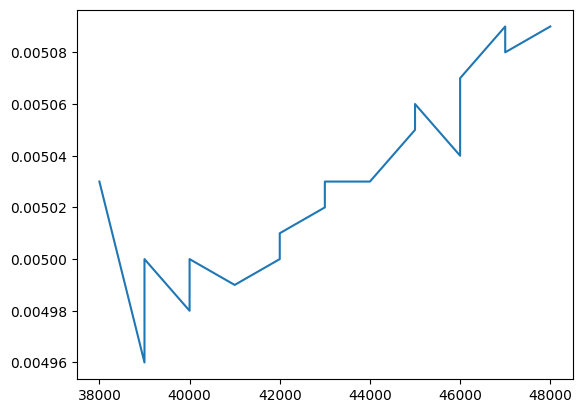

In [45]:
plt.plot(models.get('cycle-1')["Steps"][40:60], models.get('cycle-1')["Loss"][40:60] )

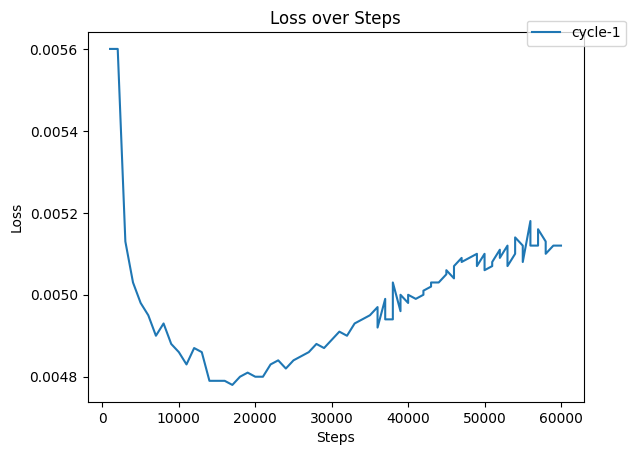

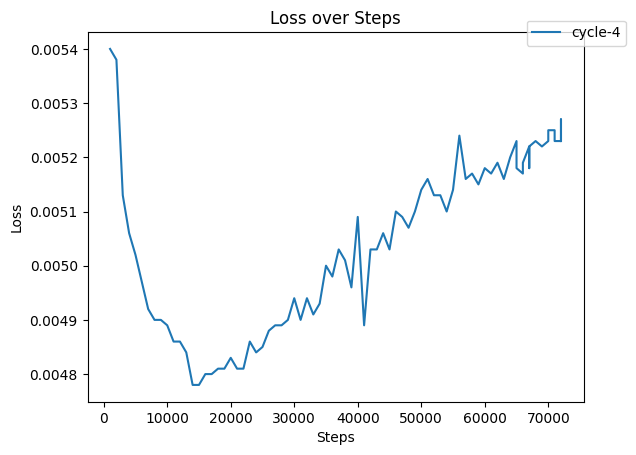

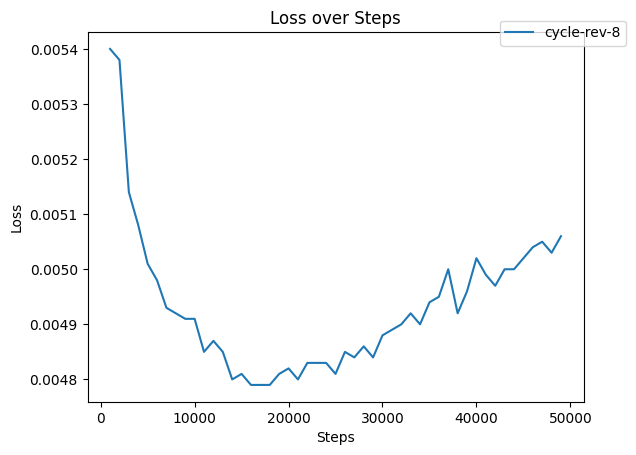

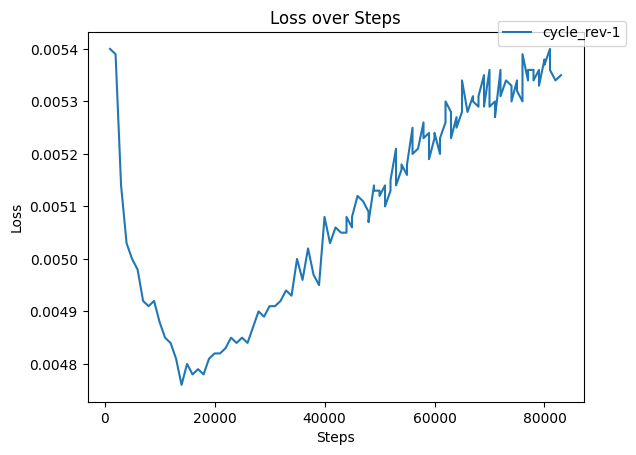

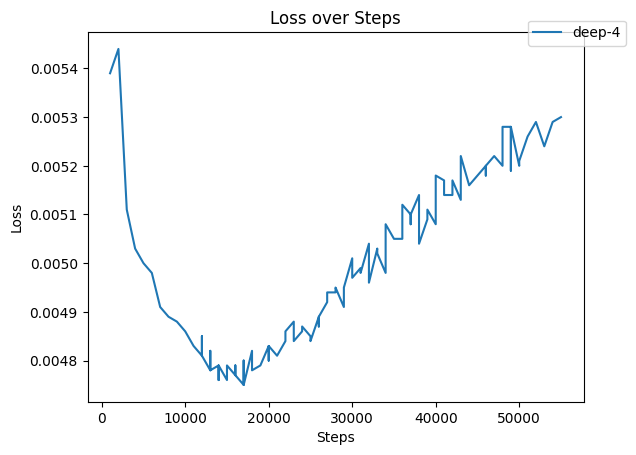

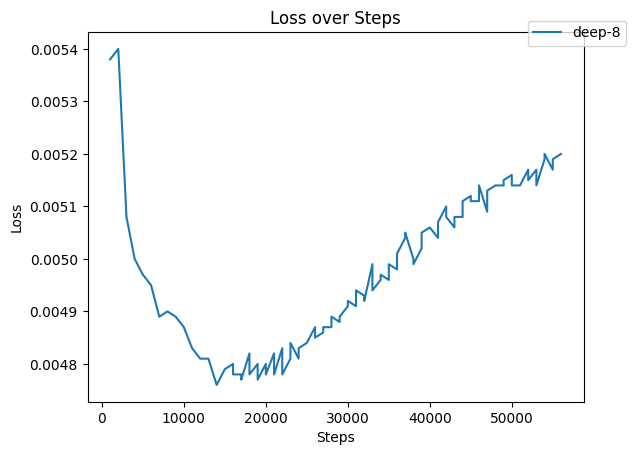

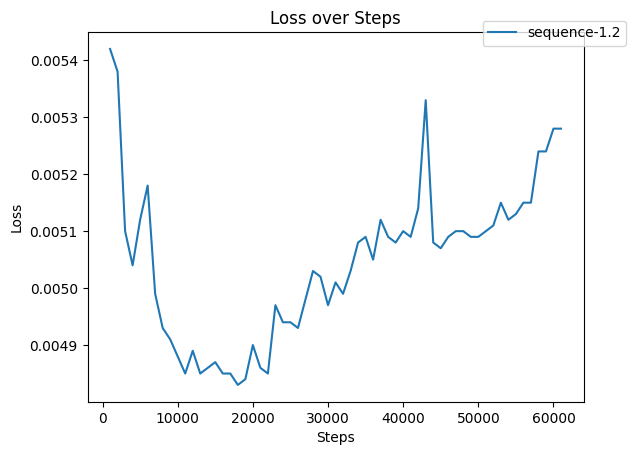

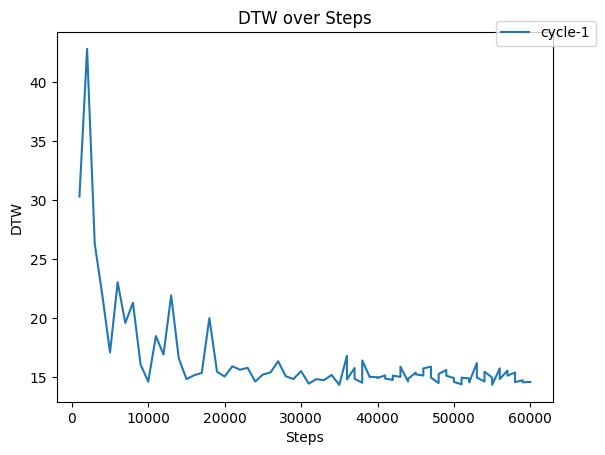

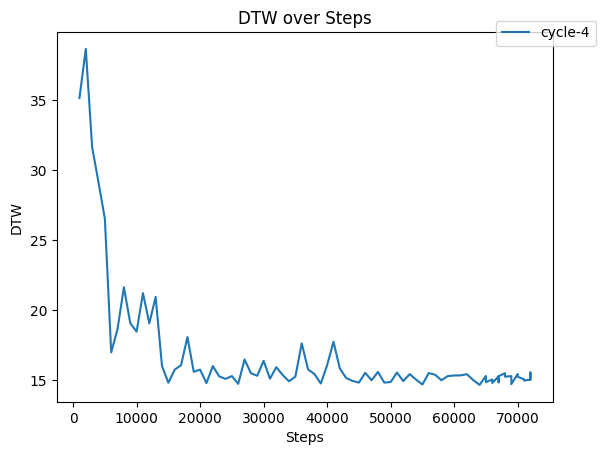

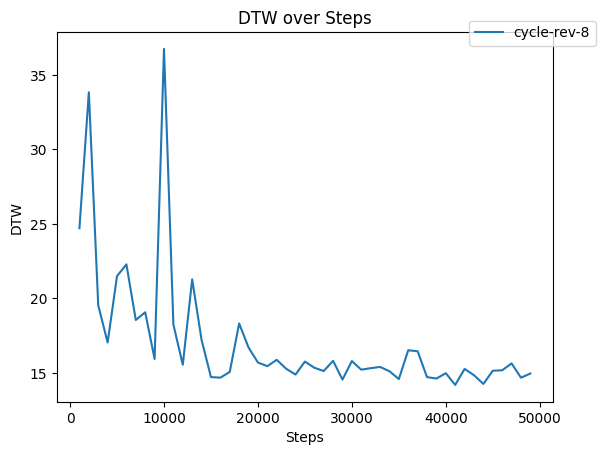

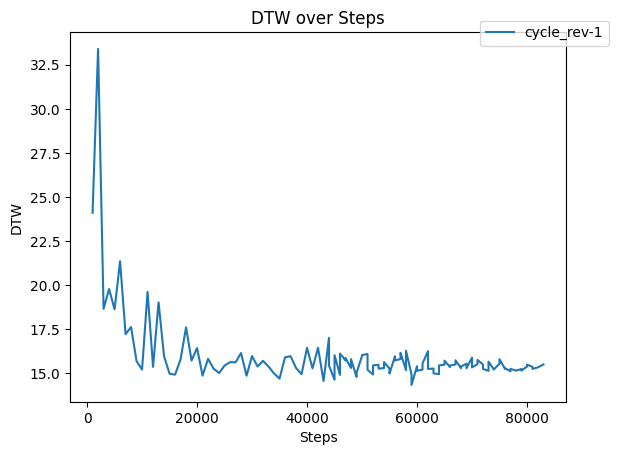

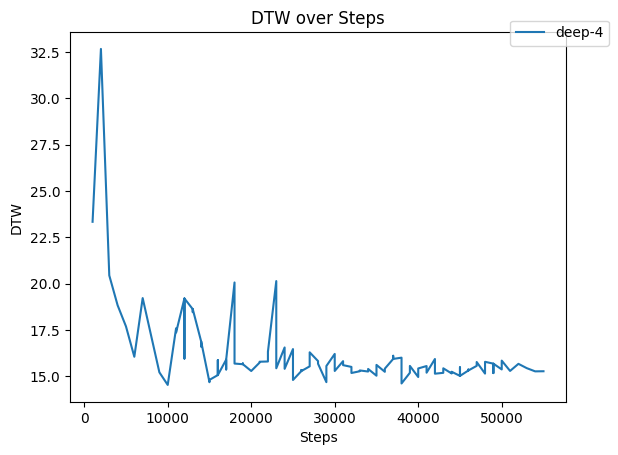

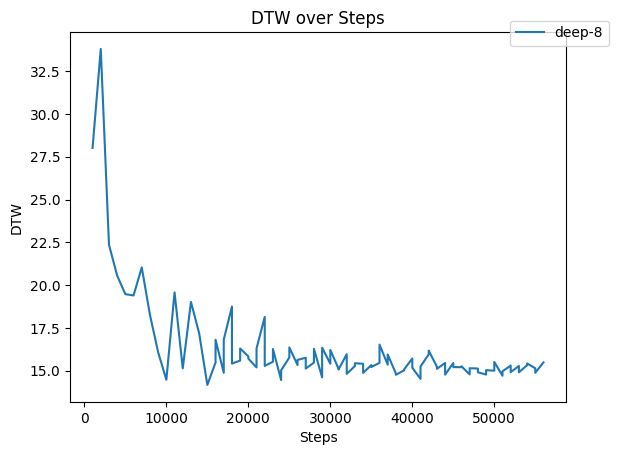

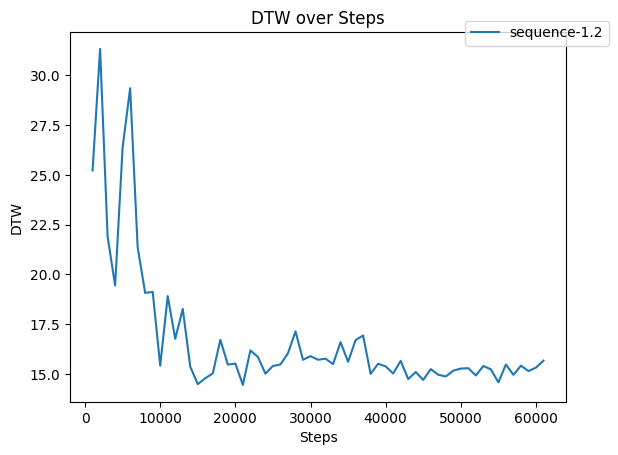

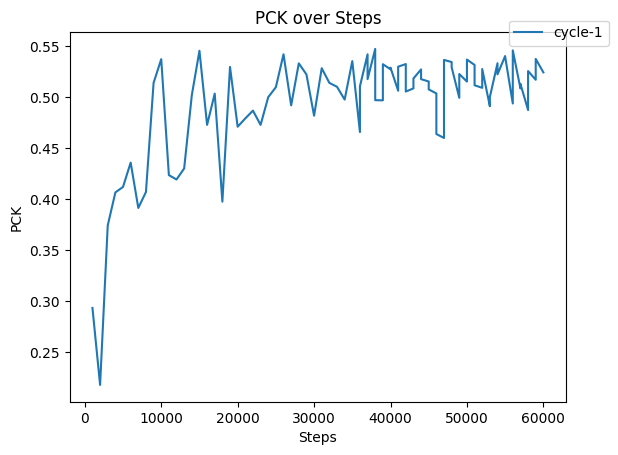

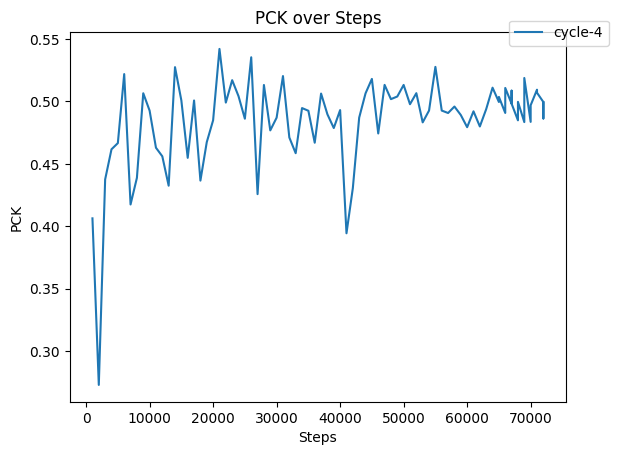

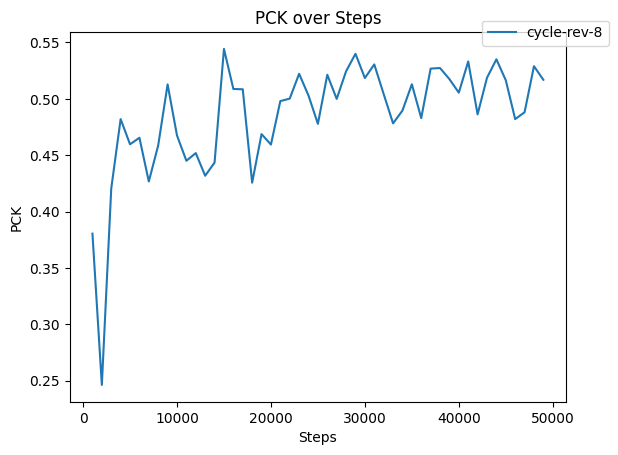

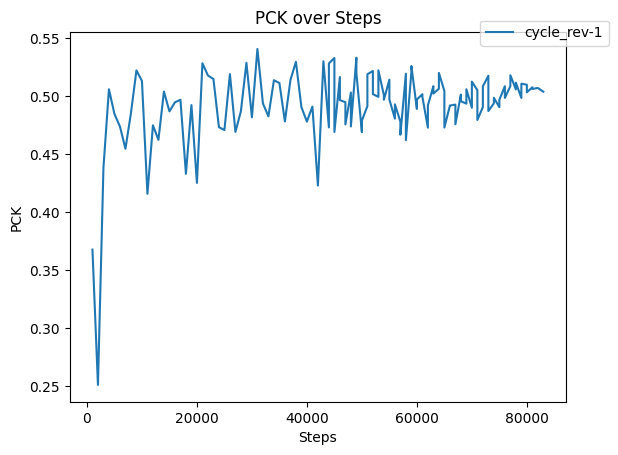

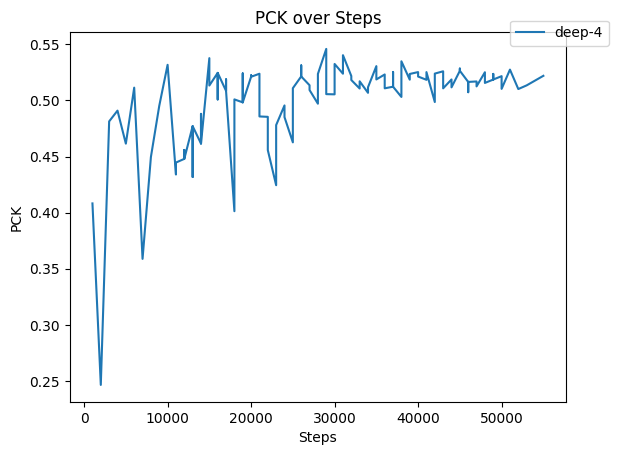

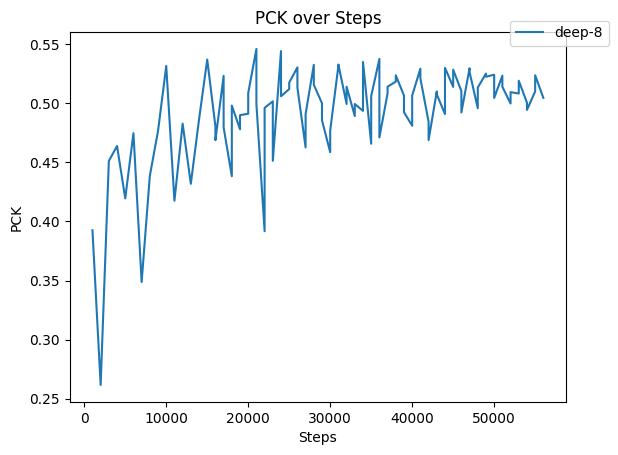

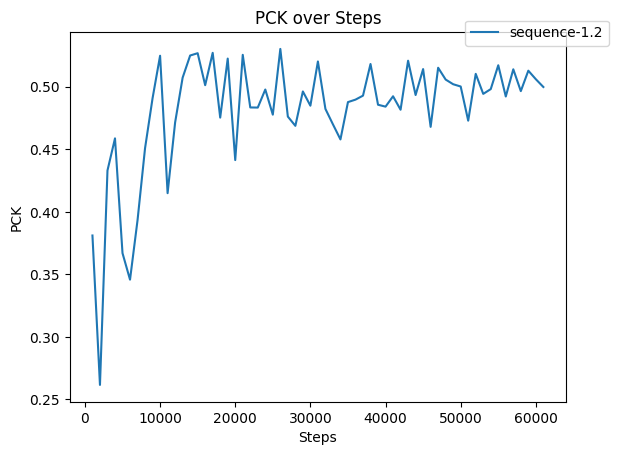

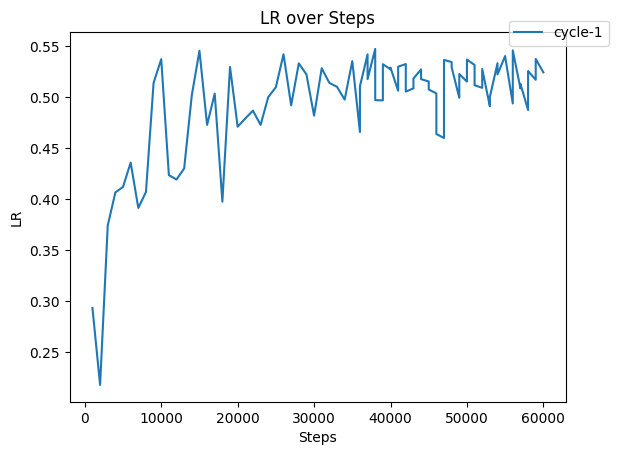

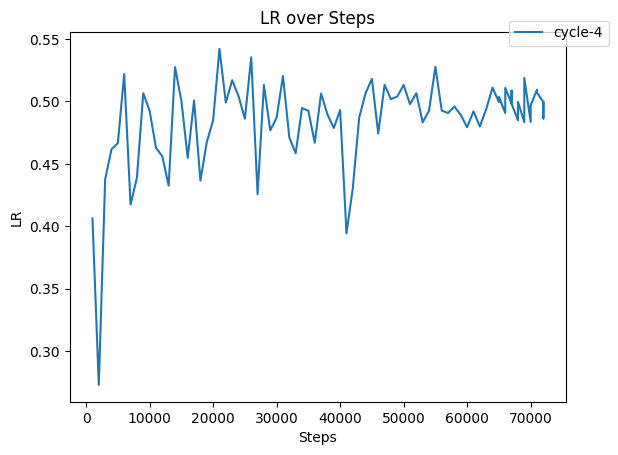

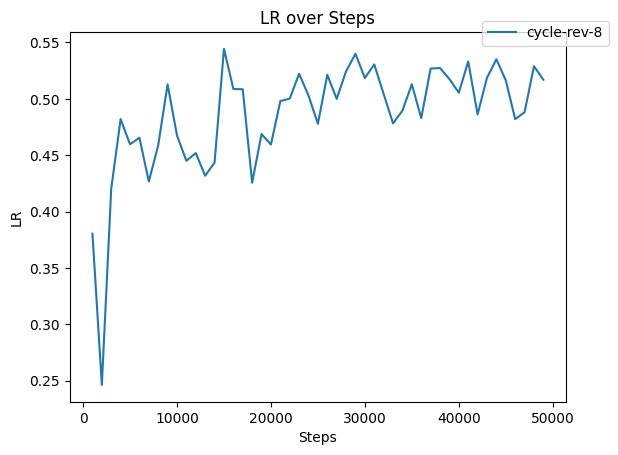

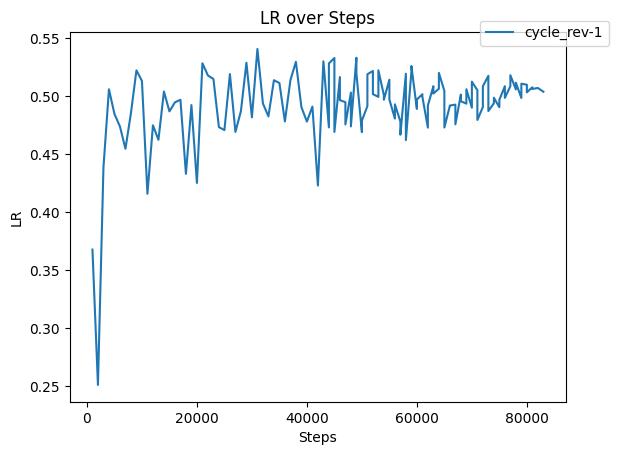

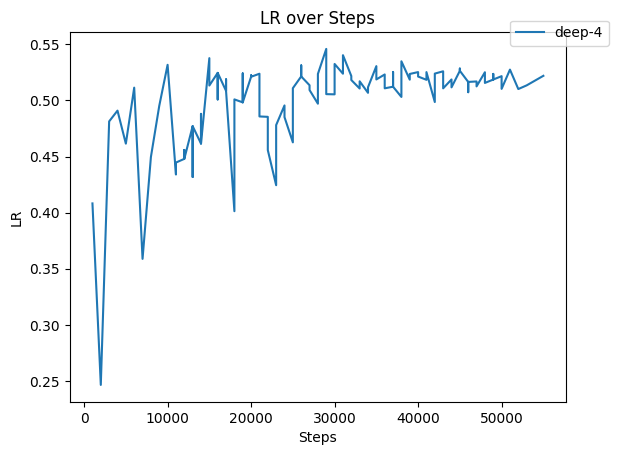

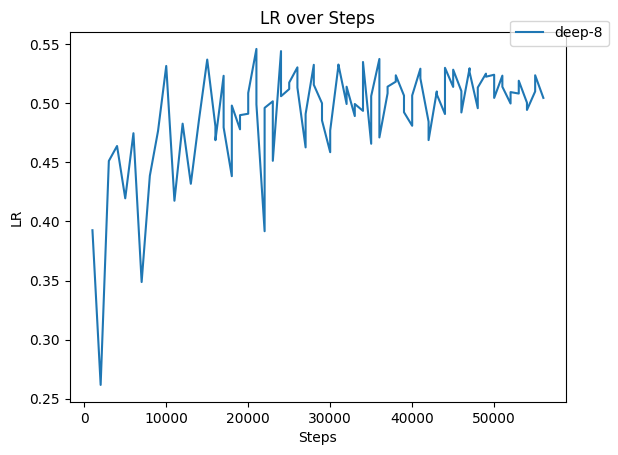

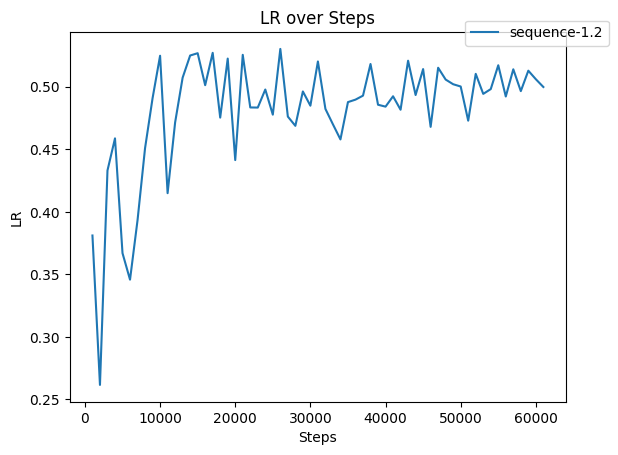

In [46]:
metrics = ["Loss", "DTW", "PCK", "LR"]
for m in metrics:
    for keys in models:
        plt.plot(models.get(keys)["Steps"], models.get(keys)[m], label= keys)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.xlabel("Steps")
        plt.ylabel(m)
        plt.title(f"{m} over Steps")
        plt.show()
   

In [17]:
concatenated_df = pd.concat(models.values(), ignore_index=True)
average_values = concatenated_df.groupby('Steps').mean()
average_values

,Loss,DTW,PCK,LR
Steps,,,,
1000,0.005427,27.264286,0.375716,0.375716
2000,0.005424,35.214714,0.251177,0.251177
3000,0.005119,22.978571,0.433754,0.433754
4000,0.005039,20.955714,0.467101,0.467101
5000,0.005014,21.043000,0.438720,0.438720
...,...,...,...,...
79000,0.005345,15.198000,0.504425,0.504425
80000,0.005375,15.435000,0.506400,0.506400
81000,0.005380,15.307000,0.506765,0.506765


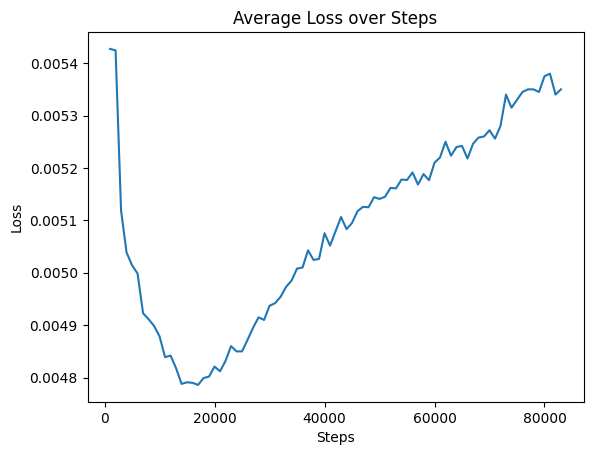

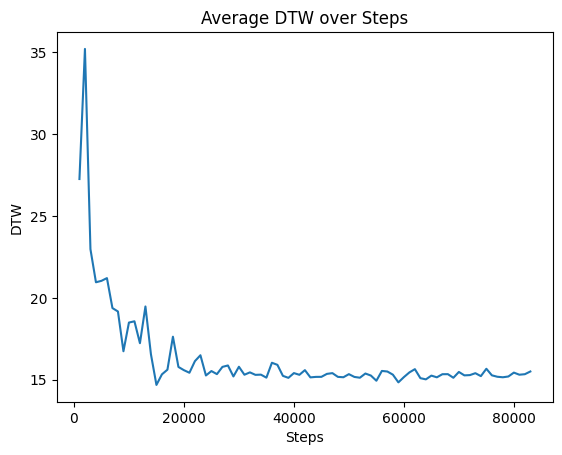

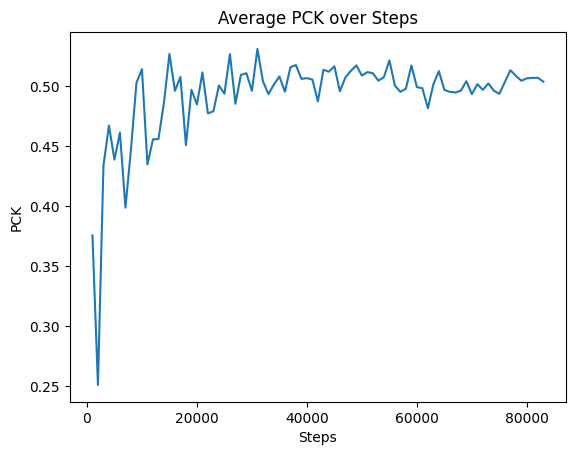

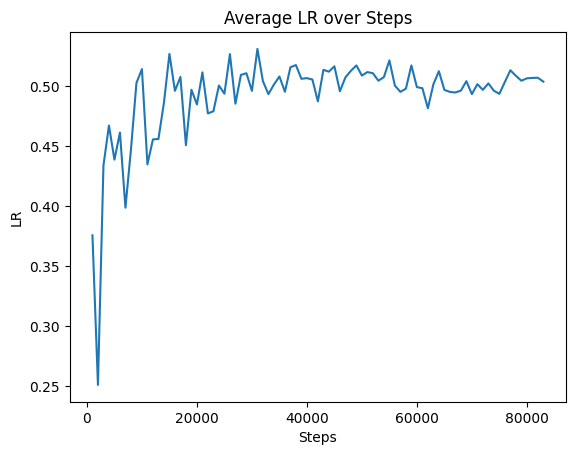

In [47]:
metrics = ["Loss", "DTW", "PCK", "LR"]
for m in metrics:
    plt.plot(average_values.index, average_values[m], label= keys)
    #plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Steps")
    plt.ylabel(m)
    plt.title(f"Average {m} over Steps")
    plt.show()
   